# Peptide Identification Dot Plot Visualization

This notebook creates a dot plot visualization comparing peptide identifications across different sample types and search methods, with error bars and custom styling.

Plot saved to figures/peptide_identifications_barchart.png


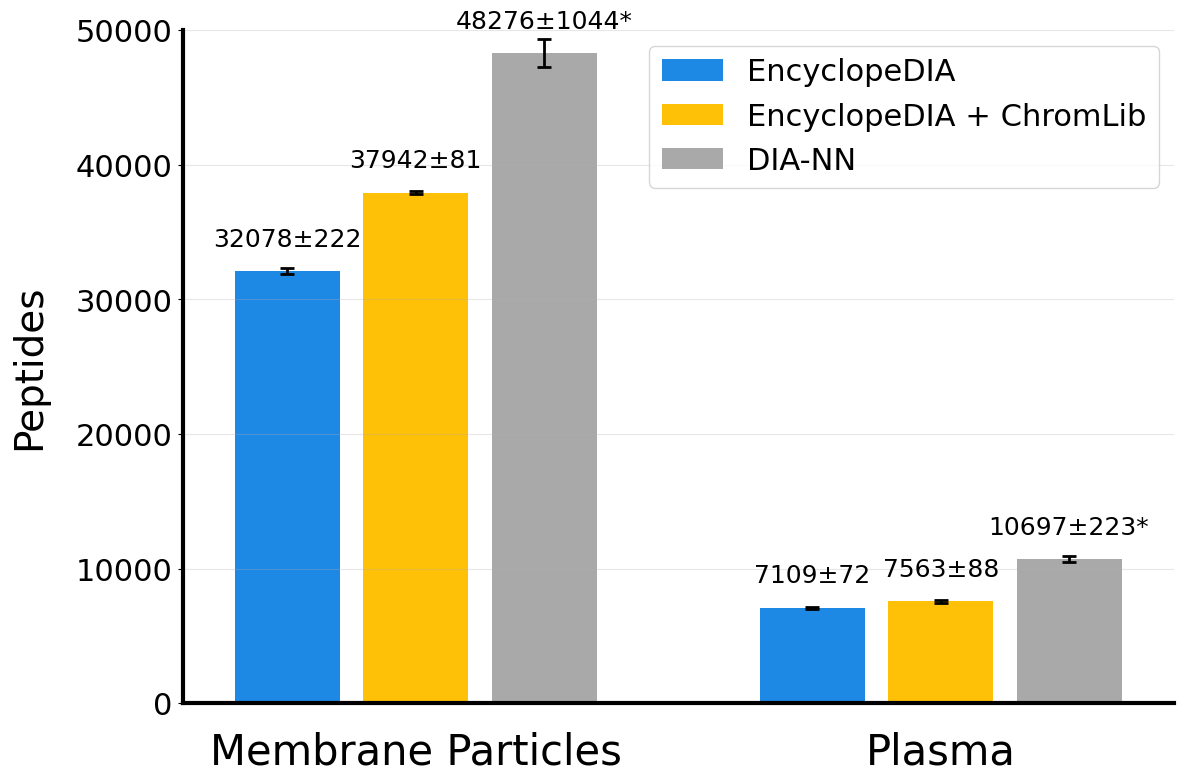

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
import os

# Set up font styles
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelcolor'] = 'black'
#plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

# Read the data from CSV
df = pd.read_csv('../csv/Peptide_identification_numbers.csv')

# Reshape the data for easier plotting
# First, create an empty list to store our transformed data
data = []

# Process each row in the original CSV
for index, row in df.iterrows():
    search_method = row['Search Method']
    
    # For Membrane Particles
    data.append({
        'Sample_Type': 'Membrane Particles',
        'Search_Method': search_method,
        'Replicate': index % 3 + 1,  # Assuming 3 replicates per method
        'Peptide_Count': row['Membrane Particles']
    })
    
    # For Plasma
    data.append({
        'Sample_Type': 'Plasma',
        'Search_Method': search_method,
        'Replicate': index % 3 + 1,  # Assuming 3 replicates per method
        'Peptide_Count': row['Plasma']
    })

# Create a new DataFrame from the transformed data
df_plot = pd.DataFrame(data)

# Calculate means and standard deviations for each group
summary = df_plot.groupby(['Sample_Type', 'Search_Method'])['Peptide_Count'].agg(['mean', 'std']).reset_index()

# Set up the figure
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')

# Define colors to match the figure
colors = {
    'EncyclopeDIA': '#1E88E5',  # blue
    'EncyclopeDIA + ChromLib': '#FFC107',  # yellow
    'DIA-NN': '#A9A9A9'  # grey
}

# Set up sample types and methods
sample_types = ['Membrane Particles', 'Plasma']
search_methods = ['EncyclopeDIA', 'EncyclopeDIA + ChromLib', 'DIA-NN']

# Set up x positions for sample types
x_pos = [0, 0.9]
width = 0.22  # Width for spacing between method groups

# Create bar chart with error bars
for i, method in enumerate(search_methods):
    # Position offset for this method
    offset = (i - 1) * width
    
    for j, sample_type in enumerate(sample_types):
        x = x_pos[j] + offset
        method_data = summary[(summary['Sample_Type'] == sample_type) & 
                             (summary['Search_Method'] == method)]
        
        if method_data.empty:
            continue
            
        mean_val = method_data['mean'].values[0]
        std_val = method_data['std'].values[0]
        
        # Plot bar
        ax.bar(x, mean_val, width=0.18, color=colors[method], 
              edgecolor='none', linewidth=1, zorder=1)
        
        # Add error bars
        plt.errorbar(x, mean_val, yerr=std_val, fmt='none', color='black',
                   capsize=5, capthick=2, linewidth=2, zorder=2)
        
        # Add value labels with asterisks for DIA-NN as in the example
        asterisk = '*' if method == 'DIA-NN' else ''
        plt.text(x, mean_val + 1500, f'{int(mean_val)}±{int(std_val)}{asterisk}', ha='center', va='bottom', fontsize=18, fontweight='normal')

# Customize the plot
ax.set_xticks(x_pos)
ax.set_xticklabels(sample_types, size=30, fontweight='normal')
plt.tick_params(axis='x', which='both', length=0, pad=20)  # Remove x-axis tick marks and add padding
plt.ylabel('Peptides', fontsize=28, fontweight='normal', labelpad=20)  # Add y-axis label with increased padding
plt.yticks(fontsize=22)
plt.ylim(0, 50000)
plt.xlim(-0.4, 1.3) 

# Add horizontal grid lines only (no vertical grid)
plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.grid(axis='x', visible=False)  # Ensure vertical grid is turned off

# Add a thick bottom axis line
plt.axhline(y=0, color='k', linewidth=2)

# Create custom legend
legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=colors['EncyclopeDIA'], 
                  edgecolor='none', linewidth=1, label='EncyclopeDIA'),
    plt.Rectangle((0, 0), 1, 1, facecolor=colors['EncyclopeDIA + ChromLib'], 
                  edgecolor='none', linewidth=1, label='EncyclopeDIA + ChromLib'),
    plt.Rectangle((0, 0), 1, 1, facecolor=colors['DIA-NN'], 
                  edgecolor='none', linewidth=1, label='DIA-NN')
]
plt.legend(handles=legend_elements, fontsize=22, loc='upper right')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

# Create output directory if it doesn't exist
output_dir = 'figures'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Tight layout and save
plt.tight_layout()
output_path = os.path.join(output_dir, 'peptide_identifications_barchart.png')
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.savefig(output_path.replace('.png', '.pdf'), format='pdf', bbox_inches='tight')

print(f"Plot saved to {output_path}")

# Display the plot
plt.show()

Remake the same plot as above but add the individual data points.

Plot saved to figures/peptide_identifications_barchart.png


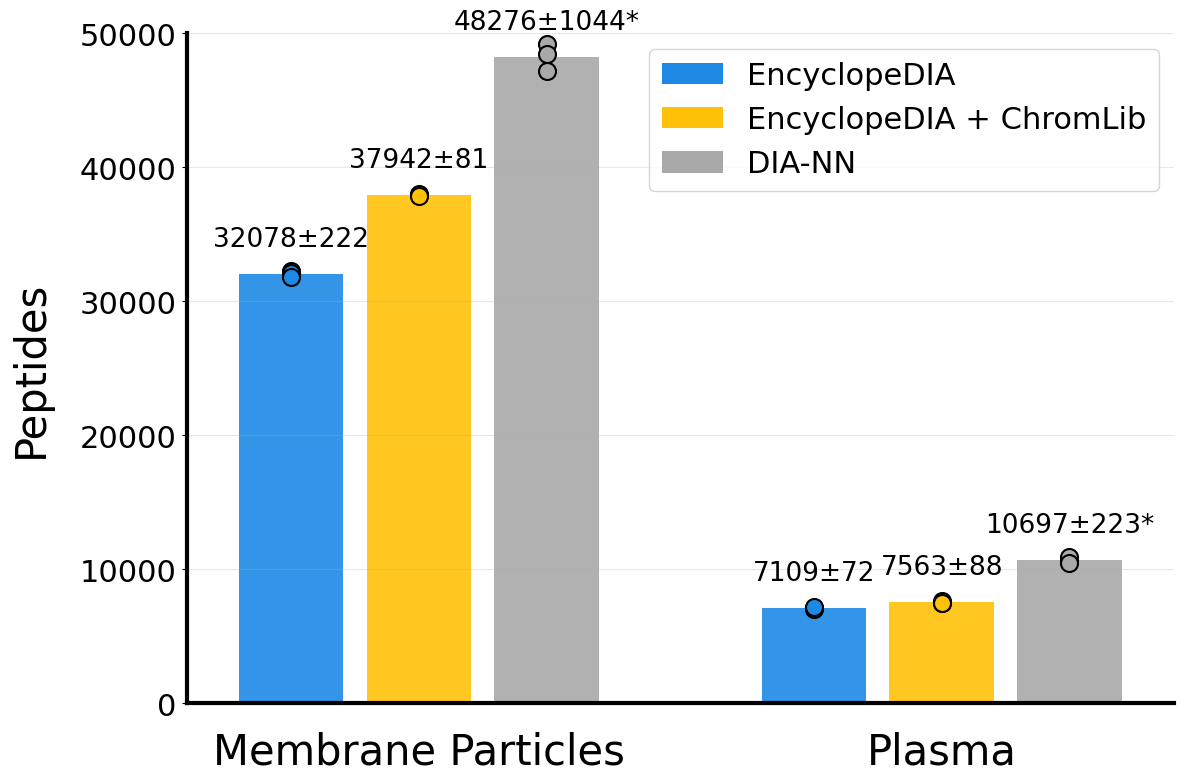

In [3]:
# Create the same plot but with individual points
plt.figure(figsize=(12, 8), facecolor='white')
ax = plt.gca()
ax.set_facecolor('white')



# Plot bars and error bars first (same as before)
for i, method in enumerate(search_methods):
    offset = (i - 1) * width
    
    for j, sample_type in enumerate(sample_types):
        x = x_pos[j] + offset
        method_data = summary[(summary['Sample_Type'] == sample_type) & 
                            (summary['Search_Method'] == method)]
        
        if method_data.empty:
            continue
            
        mean_val = method_data['mean'].values[0]
        std_val = method_data['std'].values[0]
        
        # Plot bar
        ax.bar(x, mean_val, width=0.18, color=colors[method], 
              edgecolor='none', linewidth=1, alpha=0.9, zorder=1)
        
        # Add error bars
        plt.errorbar(x, mean_val, yerr=std_val, fmt='none', color='black',
                    capsize=5, capthick=2, linewidth=2, zorder=2)
        
        # Add value labels
        asterisk = '*' if method == 'DIA-NN' else ''
        plt.text(x, mean_val + 1600, f'{int(mean_val)}±{int(std_val)}{asterisk}', 
                ha='center', va='bottom', fontsize=19, fontweight='normal')
        
        # Add individual points
        points = df_plot[(df_plot['Sample_Type'] == sample_type) & 
                        (df_plot['Search_Method'] == method)]
        plt.scatter([x] * len(points), points['Peptide_Count'], 
                   color=colors[method], s=150, zorder=3, 
                   edgecolor='black', linewidth=1.5)

# Rest of the plotting code (same as before)
ax.set_xticks(x_pos)
ax.set_xticklabels(sample_types, size=30, fontweight='normal')
plt.tick_params(axis='x', which='both', length=0, pad=20)
plt.ylabel('Peptides', fontsize=30, fontweight='normal', labelpad=20)
plt.yticks(fontsize=22)
plt.ylim(0, 50000)
plt.xlim(-0.4, 1.3)

plt.grid(axis='y', linestyle='-', alpha=0.3)
plt.grid(axis='x', visible=False)
plt.axhline(y=0, color='k', linewidth=2)

legend_elements = [
    plt.Rectangle((0, 0), 1, 1, facecolor=colors['EncyclopeDIA'], 
                 edgecolor='none', linewidth=1, label='EncyclopeDIA'),
    plt.Rectangle((0, 0), 1, 1, facecolor=colors['EncyclopeDIA + ChromLib'], 
                 edgecolor='none', linewidth=1, label='EncyclopeDIA + ChromLib'),
    plt.Rectangle((0, 0), 1, 1, facecolor=colors['DIA-NN'], 
                 edgecolor='none', linewidth=1, label='DIA-NN')
]
plt.legend(handles=legend_elements, fontsize=22, loc='upper right')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

plt.tight_layout()
plt.savefig(output_path.replace('.png', '_with_dots.png'), dpi=300, bbox_inches='tight')
plt.savefig(output_path.replace('.png', '_with_dots.pdf'), format='pdf', bbox_inches='tight')

print(f"Plot saved to {output_path}")

plt.show()